In [1]:
%pylab inline
import pandas as pd
import mglearn

Populating the interactive namespace from numpy and matplotlib


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
X, y = mglearn.datasets.load_extended_boston()

In [3]:
X.shape, y.shape

((506, 104), (506,))

In [6]:
from sklearn.model_selection import train_test_split


In [7]:
X_train, y_train, X_test, y_test = train_test_split(X,y, random_state =0)

In [8]:
X_train.shape

(379, 104)

w[0]: 0.393906  b: -0.031804


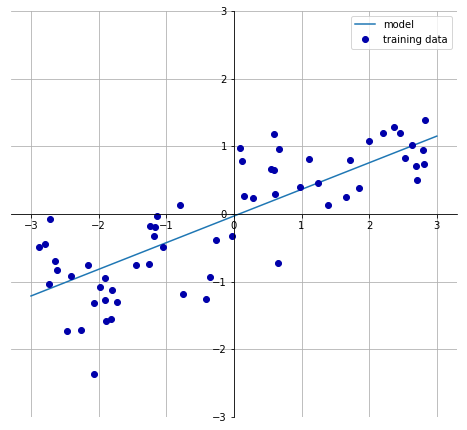

In [16]:
mglearn.plots.plot_linear_regression_wave()

_Linear regression (aka ordinary least squares)_

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
X,y = mglearn.datasets.make_wave(n_samples= 60)

In [12]:
X[0],y[0]

(array([-0.75275929]), -1.1807331091906834)

In [13]:
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [14]:
lr = LinearRegression().fit(X_train, y_train)

The “slope” parameters (w), also called weights or coefcients, are stored in the coef_
attribute, while the offset or intercept (b) is stored in the intercept_ attribute

In [15]:
print(lr.coef_)
print(lr.intercept_)

[0.39390555]
-0.031804343026759746


In [16]:
print('Trainig set score:{:.2f}'.format(lr.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(lr.score(X_test, y_test)))

Trainig set score:0.67
Test set score:0.66


In [17]:
X,y = mglearn.datasets.load_extended_boston()

In [18]:
X.shape

(506, 104)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

In [20]:
lr = LinearRegression().fit(X_train,y_train)

In [21]:
print('Trainig set score:{:.2f}'.format(lr.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(lr.score(X_test, y_test)))

Trainig set score:0.95
Test set score:0.61


## Ridge

In [22]:
from sklearn.linear_model import Ridge

In [23]:
ridge = Ridge().fit(X_train,y_train)
print('Trainig set score:{:.2f}'.format(ridge.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(ridge.score(X_test, y_test)))

Trainig set score:0.89
Test set score:0.75


In [50]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print('Trainig set score:{:.2f}'.format(ridge.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(ridge.score(X_test, y_test)))

Trainig set score:0.89
Test set score:0.75


In [51]:
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
print('Trainig set score:{:.2f}'.format(ridge.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(ridge.score(X_test, y_test)))

Trainig set score:0.89
Test set score:0.75


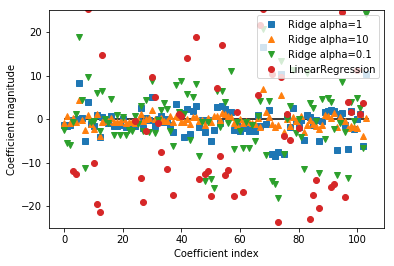

In [56]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression");

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))

plt.ylim(-25, 25)
plt.legend(loc =1)

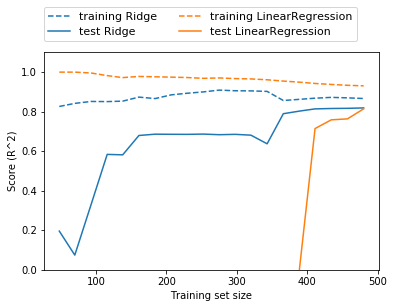

In [57]:
mglearn.plots.plot_ridge_n_samples()

* As one would expect, the training score is higher than the test score for all dataset sizes, for both ridge and linear regression. 
* Because ridge is regularized, the training score of ridge is lower than the training score for linear regression across the board.
* However, the test score for ridge is better, particularly for small subsets of the data.
* For less than 400 data points, linear regression is not able to learn anything. As more and more data becomes available to the model, both models improve, and linear regression catches up with ridge in the end.
* The lesson here is that with enough training data, regularization becomes less important, and given enough data, ridge and linear regression will have the same performance

## Lasso

* An alternative to Ridge for regularizing linear regression is Lasso

In [74]:
from sklearn.linear_model import Lasso

In [75]:
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print('Number of features used:{}'.format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used:4


In [79]:
lasso01 = Lasso(alpha=0.01,max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso01.score(X_test, y_test)))
print('Number of features used:{}'.format(np.sum(lasso01.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used:33


In [83]:
lasso001 = Lasso(alpha=0.001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.94
Test set score: 0.74
Number of features used: 69


In [84]:
lasso0001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso0001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso0001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso0001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 94


Text(0,0.5,'Coefficient magnitude')

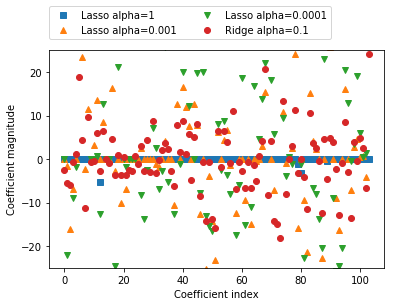

In [85]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.001")
plt.plot(lasso0001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")

plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

* For alpha=1, we not only see that most of the coefficients are zero (which we already knew), but that the remaining coefficients are also small in magnitude. Decreasing alpha to 0.01, we obtain the solution shown as the green dots, which causes most features to be exactly zero. Using alpha=0.00001, we get a model that is quite unregularized, with most coefficients nonzero and of large magnitude.
* The Ridge model with alpha=0.1 has similar predictive performance as the lasso model with alpha=0.01, but using Ridge, all coefficients are nonzero.

## Linear models for classifcation

* The two most common linear classification algorithms are logistic regression, implemented in linear_model.LogisticRegression, and linear support vector machines (linear SVMs), implemented in svm.LinearSVC (SVC stands for support vector classifier).
* Despite its name, LogisticRegression is a classification algorithm and not a regression algorithm, and it should not be confused with LinearRegression

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

E:\Python\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


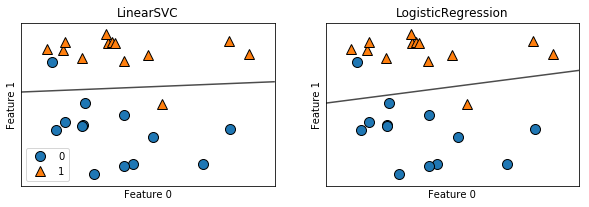

In [96]:
X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2, figsize = (10,3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                   ax = ax, alpha = 0.7)
    mglearn.discrete_scatter(X[:,0],X[:,1], y , ax = ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()